# Imports

In [ ]:
import torchrain as tr # import torchrain 
from matplotlib import pyplot as plt

# Load OpenCML Dataset

In [13]:
open_cml_dataset = tr.read_open_cml_dataset('../data/open_cml.p') #  read OpenCML dataset

# Select Link and Plot link data

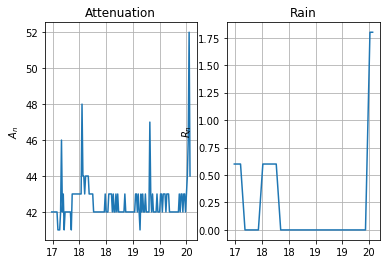

In [14]:
link_index = 0 
link_data = open_cml_dataset[link_index] # select a link 
link_data.plot() # plot link data

# Run Statistics wet dry classification
This section performance wet dry classification using statistics test, this method introduced by [1]. </br>
The first step is calculating the standard deviation over a window of samples using the following equation:
$$ \sigma_n=\Bigg[\frac{1}{|W_n|}\sum_{k \in W_n}\Big(A_k-E_{W_n}[A]\Big)^2\Bigg]^{\frac{1}{2}} $$ </br>
where $W_n$ is a moving standard deviation window in range $[n,n+N_w]$ , $A_k$ is the instance attenuation measurement of sample $k$ and $A$ is the vector of all samples and
$N_w=|W_n|$ is an hyper-parameter that set the window size. </br> 
$$E_{W_n}[A]=\frac{1}{|W_n|}\sum_{k \in W_n}A_k $$  </br>
Once we obtained the standard deviation vector $\sigma_n$, we 

In [15]:
swd = tr.wet_dry.statistics_wet_dry(1.1, 4) # init classification model
wd_classification, std_vector = swd(link_data.attenuation()) # run classification method

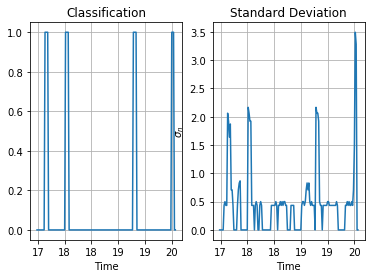

In [16]:
plt.subplot(1, 2, 1)
plt.plot(link_data.time, wd_classification.numpy()[0, :])
plt.title('Classification')
plt.xlabel('Time')
tr.change_x_axis_time_format('%H')
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(link_data.time, std_vector.numpy()[0, :])
plt.xlabel('Time')
plt.title('Standard Deviation')
tr.change_x_axis_time_format('%H')
plt.ylabel(r'$\sigma_n$')
plt.grid()
plt.show()

# References
[1] 

